### Carga de datos

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)

tad = pd.read_parquet('../data/ecobici/tad_viajes_G28.parquet')

tad.head()

,Ciclo_Estacion_Retiro,ancla,v_F_tot_sum_100,v_M_tot_sum_100,v_N_tot_sum_100,v_O_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_N_tot_mean_100,v_O_tot_mean_100,v_edad_prom_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_N_tot_min_100,v_O_tot_min_100,v_edad_prom_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_N_tot_max_100,v_O_tot_max_100,v_edad_prom_max_100,v_pct_F_max_100,v_pct_M_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_F_tot_std_100,v_M_tot_std_100,v_N_tot_std_100,v_O_tot_std_100,v_edad_prom_std_100,v_pct_F_std_100,v_pct_M_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100,y
0,001,202,19.0,93.0,0.0,1.0,303.290312,1.459266,0.052632,113.0,274.133333,105.673025,33.083333,71.202222,2.375,11.625,0.0,0.125,37.911289,0.182408,0.006579,14.125,34.266667,13.209128,4.135417,0.0,3.0,0.0,0.0,30.142857,0.000000,0.0,7.0,19.183333,10.602381,2.350000,5.0,21.0,0.0,1.0,41.428571,0.625000,0.052632,26.0,54.150000,17.307018,6.600000,8.900278,5.344537,11.306875,1.767767,5.950690,0.0,0.353553,3.571382,0.187060,0.018608,6.685539,11.716506,2.384026,1.398935,1.855736,19
1,002,202,15.0,19.0,0.0,2.0,280.416667,3.250000,0.750000,36.0,179.066667,95.234722,44.050000,60.043060,1.875,2.375,0.0,0.250,35.052083,0.406250,0.093750,4.500,22.383333,11.904340,5.506250,0.0,0.0,0.0,0.0,32.500000,0.000000,0.0,2.0,6.866667,4.358333,1.850000,3.0,4.0,0.0,1.0,39.000000,0.500000,0.500000,6.0,32.250000,15.970833,11.750000,7.505383,3.547319,13.603440,1.125992,1.302470,0.0,0.462910,2.545591,0.186006,0.186006,1.414214,7.739771,3.393009,3.308670,3.396134,6
2,005,202,24.0,56.0,0.0,0.0,291.052742,2.318975,0.000000,80.0,274.150000,121.380975,35.300000,74.330705,3.000,7.000,0.0,0.000,36.381593,0.289872,0.000000,10.000,34.268750,15.172622,4.412500,1.0,2.0,0.0,0.0,32.909091,0.083333,0.0,6.0,13.400000,7.858333,1.766667,9.0,11.0,0.0,0.0,43.100000,0.818182,0.000000,14.0,84.000000,22.790909,8.250000,9.291338,4.633702,22.704544,2.927700,3.116775,0.0,0.000000,4.109456,0.243159,0.000000,2.878492,21.220837,4.119011,2.434014,5.743147,14
3,006,202,21.0,55.0,0.0,1.0,293.541880,2.349573,0.066667,77.0,291.766667,114.168526,41.966667,72.220109,2.625,6.875,0.0,0.125,36.692735,0.293697,0.008333,9.625,36.470833,14.271066,5.245833,1.0,2.0,0.0,0.0,30.384615,0.111111,0.0,3.0,9.333333,6.104167,1.916667,5.0,11.0,0.0,1.0,45.666667,0.500000,0.066667,15.0,119.183333,20.258974,17.566667,9.027514,1.267251,30.307828,1.505941,3.356763,0.0,0.353553,5.150489,0.134219,0.023570,4.274091,34.658066,4.685169,5.121018,9.073715,15
4,007,202,30.0,93.0,0.0,2.0,304.940702,2.103975,0.121795,125.0,285.350000,123.280836,37.400000,72.645566,3.750,11.625,0.0,0.250,38.117588,0.262997,0.015224,15.625,35.668750,15.410104,4.675000,2.0,4.0,0.0,0.0,32.952381,0.133333,0.0,7.0,20.850000,12.068889,3.266667,6.0,19.0,0.0,1.0,44.466667,0.428571,0.083333,26.0,44.900000,20.045833,7.166667,9.080696,5.174310,13.814188,1.281740,5.262740,0.0,0.462910,4.451326,0.110606,0.030635,5.804862,9.677455,2.500899,1.348897,3.333633,26


### Variables

In [3]:
um = ['Ciclo_Estacion_Retiro', 'ancla']
tgt = 'y' # target
varc = tad.filter(like='v_').columns.tolist()
len(varc), varc

(60,
 ['v_F_tot_sum_100',
  'v_M_tot_sum_100',
  'v_N_tot_sum_100',
  'v_O_tot_sum_100',
  'v_edad_prom_sum_100',
  'v_pct_F_sum_100',
  'v_pct_M_sum_100',
  'v_personas_tot_sum_100',
  'v_tiempo_viaje_max_sum_100',
  'v_tiempo_viaje_mean_sum_100',
  'v_tiempo_viaje_min_sum_100',
  'v_tiempo_viaje_std_sum_100',
  'v_F_tot_mean_100',
  'v_M_tot_mean_100',
  'v_N_tot_mean_100',
  'v_O_tot_mean_100',
  'v_edad_prom_mean_100',
  'v_pct_F_mean_100',
  'v_pct_M_mean_100',
  'v_personas_tot_mean_100',
  'v_tiempo_viaje_max_mean_100',
  'v_tiempo_viaje_mean_mean_100',
  'v_tiempo_viaje_min_mean_100',
  'v_F_tot_min_100',
  'v_M_tot_min_100',
  'v_N_tot_min_100',
  'v_O_tot_min_100',
  'v_edad_prom_min_100',
  'v_pct_F_min_100',
  'v_pct_M_min_100',
  'v_personas_tot_min_100',
  'v_tiempo_viaje_max_min_100',
  'v_tiempo_viaje_mean_min_100',
  'v_tiempo_viaje_min_min_100',
  'v_F_tot_max_100',
  'v_M_tot_max_100',
  'v_N_tot_max_100',
  'v_O_tot_max_100',
  'v_edad_prom_max_100',
  'v_pct_F_max_

In [4]:
X = tad[varc].copy()

### Analisis Multivariado

In [5]:
X[varc].describe(percentiles=[0.01, 0.5, 0.95, 0.99])

,v_F_tot_sum_100,v_M_tot_sum_100,v_N_tot_sum_100,v_O_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_N_tot_mean_100,v_O_tot_mean_100,v_edad_prom_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_N_tot_min_100,v_O_tot_min_100,v_edad_prom_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_N_tot_max_100,v_O_tot_max_100,v_edad_prom_max_100,v_pct_F_max_100,v_pct_M_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_F_tot_std_100,v_M_tot_std_100,v_N_tot_std_100,v_O_tot_std_100,v_edad_prom_std_100,v_pct_F_std_100,v_pct_M_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100
count,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,3.766430e+05,3.766430e+05,3.766430e+05,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.0,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,3.766430e+05,3.766430e+05,3.766430e+05,376338.000000,376338.000000,376338.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,375821.000000
mean,155.087558,384.758610,0.363875,11.534729,2923.004762,23.503917,1.881987,551.744772,3.048728e+03,1.528247e+03,7.780996e+02,868.732478,1.728783,4.298861,0.003731,0.130489,34.334427,0.274794,0.022430,6.161865,38.929429,21.869297,13.293365,0.015293,0.343049,0.0,0.000050,23.089617,0.001466,0.000025,1.320003,5.877164,4.767630,1.858424,5.980796,10.873687,0.112226,1.456445,52.482009,0.913861,0.416777,14.614064,7.545882e+02,2.881590e+02,2.179145e+02,11.086696,0.883436,198.566067,1.342576,2.254836,0.017044,0.327503,5.492459,0.231635,0.069940,2.887707,95.806295,44.717360,37.241379,23.642046
std,118.358009,282.196456,1.938443,10.632503,726.082888,7.646956,1.523535,401.529853,1.675442e+04,1.382739e+04,1.376808e+04,3337.938136,1.169239,2.761203,0.019758,0.112939,1.922847,0.062026,0.019760,3.921164,553.670612,543.445539,543.243033,0.134405,0.753112,0.0,0.007102,2.980701,0.018029,0.004025,0.939386,4.297460,2.441186,0.899990,3.110890,5.601441,0.403919,0.697960,8.245358,0.154021,0.282779,7.906163,1.671497e+04,1.383029e+04,1.376991e+04,42.861835,2.301967,3316.583778,0.555055,1.039135,0.064513,0.147895,1.795280,0.068707,0.045016,1.429349,2679.216921,2490.651638,2486.848751,371.027008
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,6.833333e-01,6.833333e-01,6.833333e-01,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.683333,0.683333,0.683333,0.000000,0.000000,0.0,0.000000,16.000000,0.000000,0.000000,1.000000,0.683333,0.683333,0.233333,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,6.833333e-01,6.833333e-01,6.833333e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023570,0.023570,0.011785,0.013487
1%,6.000000,17.000000,0.000000,0.000000,336.339167,2.166667,0.000000,25.000000,2.234280e+02,1.515307e+02,8.103067e+01,49.935356,0.342257,1.083333,0.000000,0.

array([[<Axes: title={'center': 'v_F_tot_sum_100'}>,
        <Axes: title={'center': 'v_M_tot_sum_100'}>,
        <Axes: title={'center': 'v_N_tot_sum_100'}>,
        <Axes: title={'center': 'v_O_tot_sum_100'}>,
        <Axes: title={'center': 'v_edad_prom_sum_100'}>,
        <Axes: title={'center': 'v_pct_F_sum_100'}>,
        <Axes: title={'center': 'v_pct_M_sum_100'}>,
        <Axes: title={'center': 'v_personas_tot_sum_100'}>],
       [<Axes: title={'center': 'v_tiempo_viaje_max_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_mean_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_min_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_std_sum_100'}>,
        <Axes: title={'center': 'v_F_tot_mean_100'}>,
        <Axes: title={'center': 'v_M_tot_mean_100'}>,
        <Axes: title={'center': 'v_N_tot_mean_100'}>,
        <Axes: title={'center': 'v_O_tot_mean_100'}>],
       [<Axes: title={'center': 'v_edad_prom_mean_100'}>,
        <Axes: title={'center': 

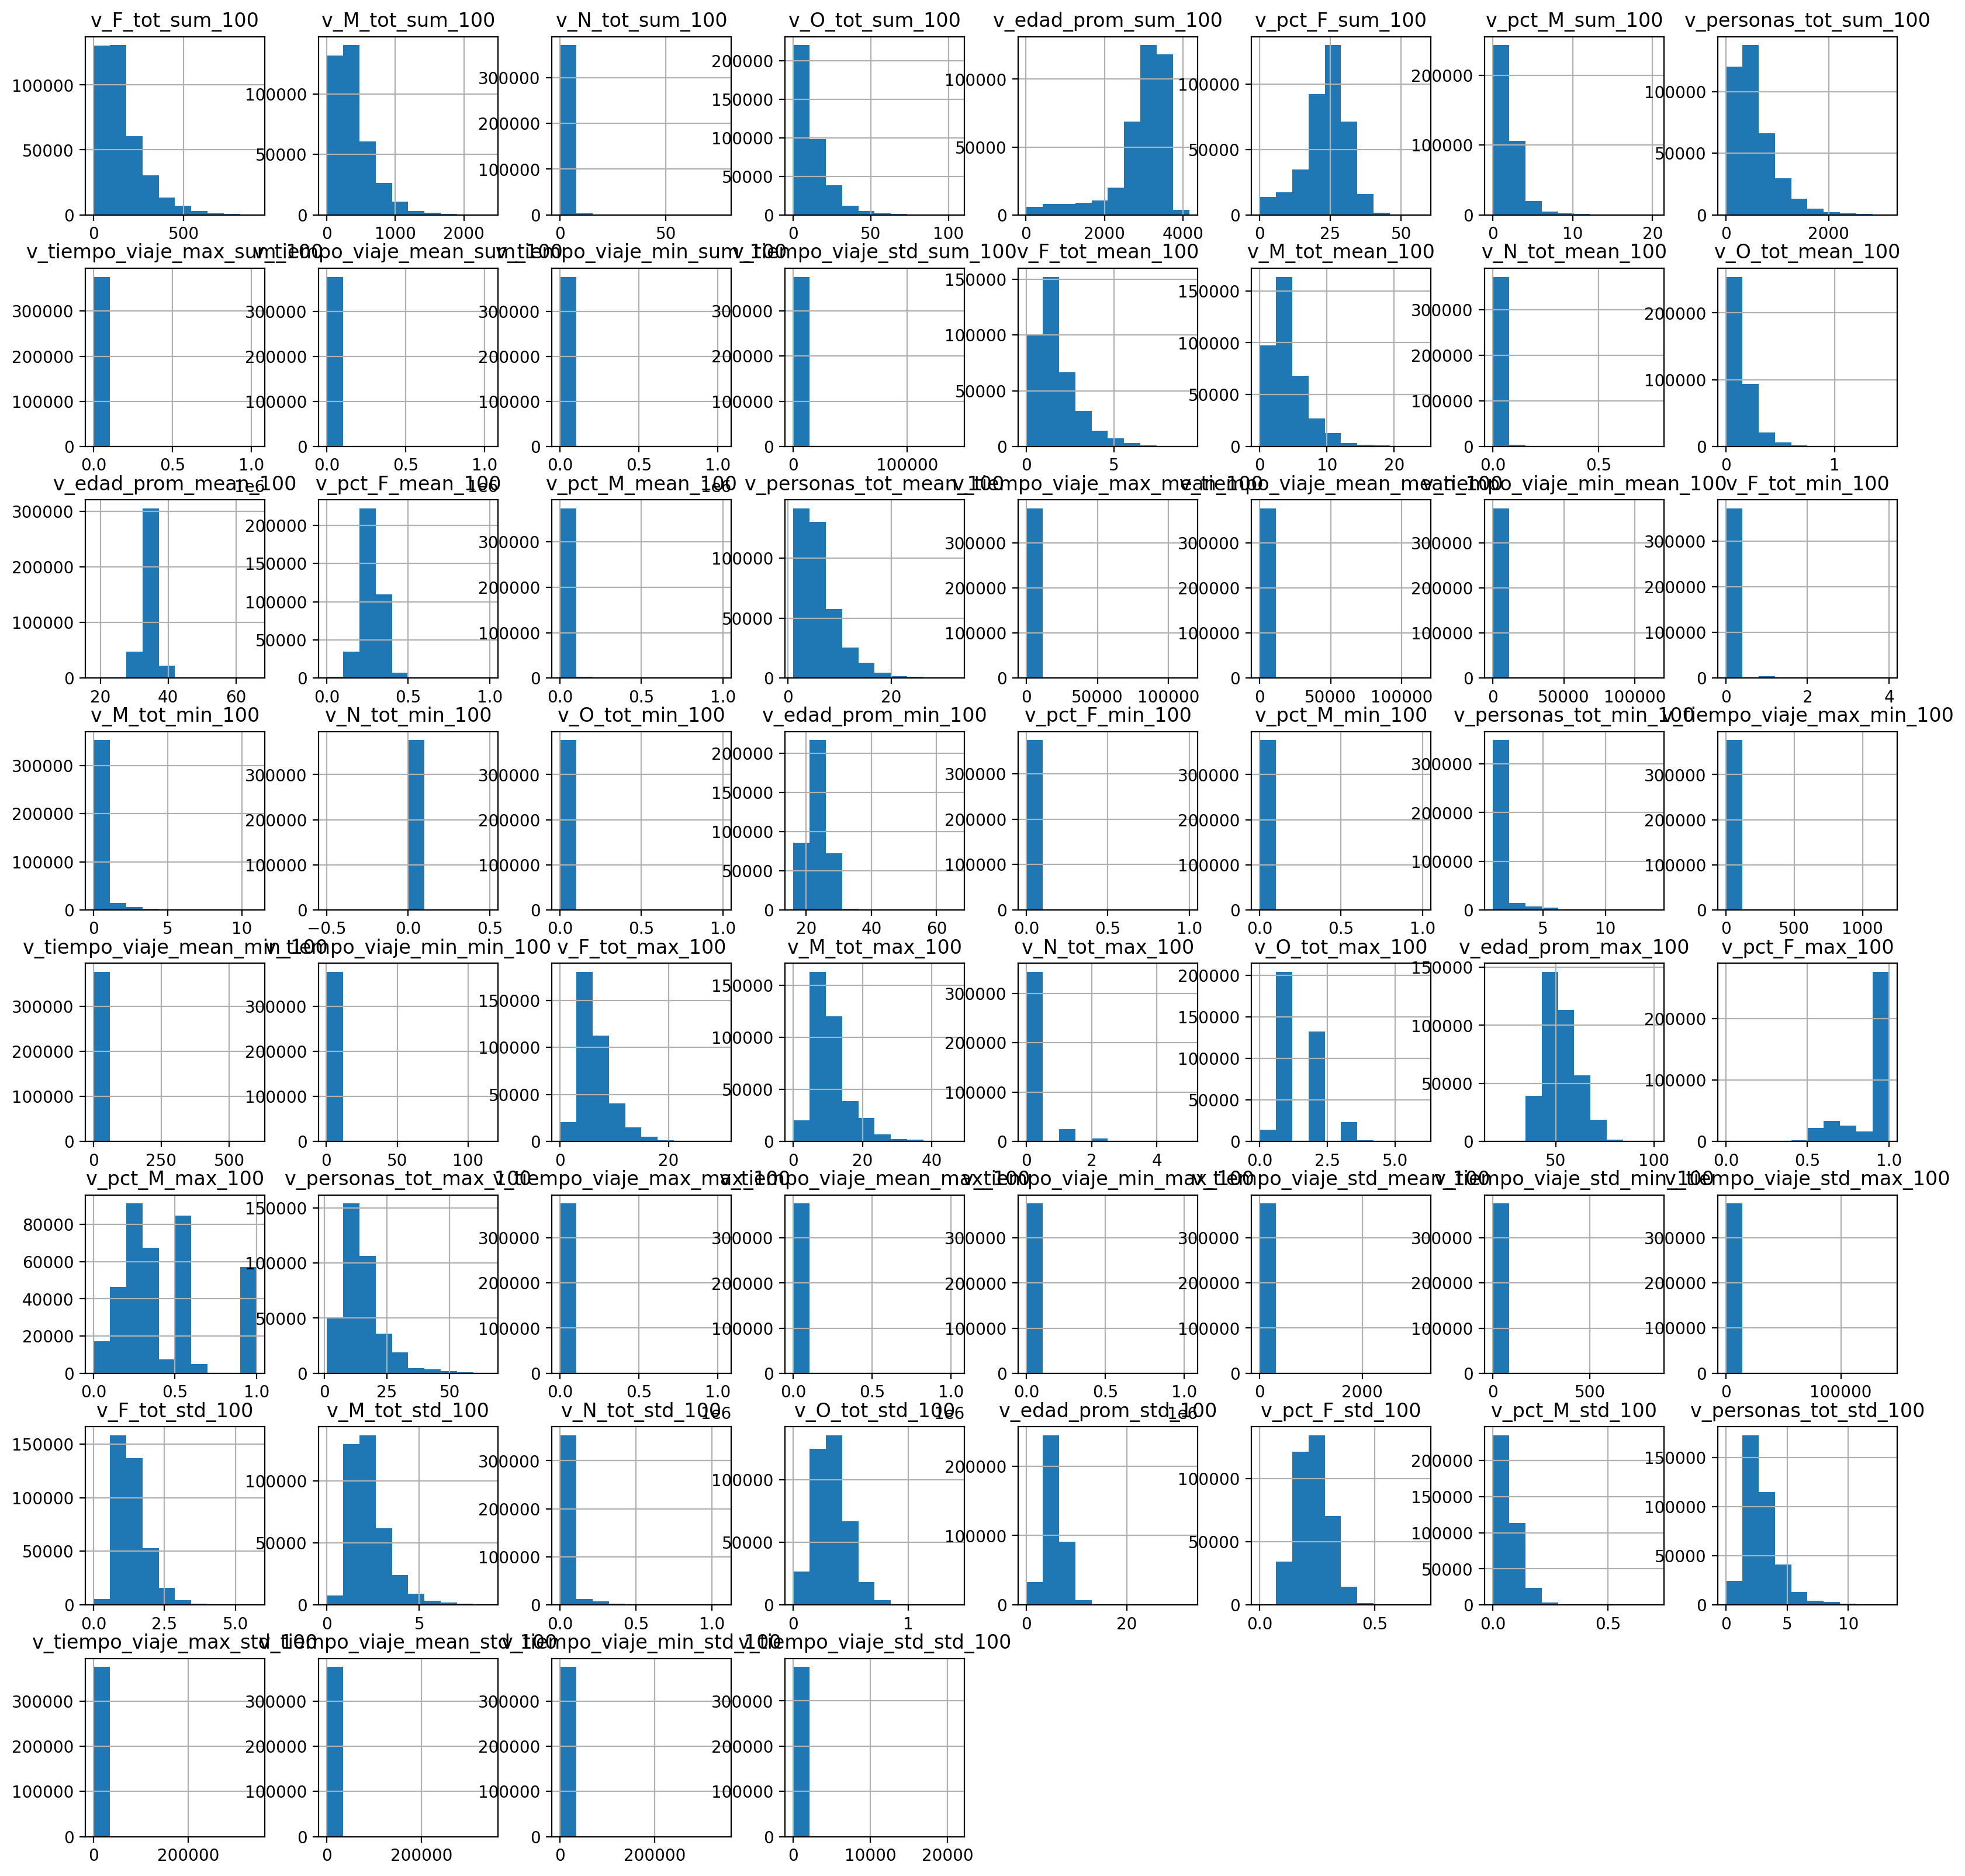

In [6]:
X[varc].hist(figsize=(20, 20))

### Valores ausentes

In [7]:
miss = 1 - X[varc].describe().T[['count']] / len(tad)
miss

,count
v_F_tot_sum_100,0.000000
v_M_tot_sum_100,0.000000
v_N_tot_sum_100,0.000000
v_O_tot_sum_100,0.000000
v_edad_prom_sum_100,0.000000
v_pct_F_sum_100,0.000000
v_pct_M_sum_100,0.000000
v_personas_tot_sum_100,0.000000
v_tiempo_viaje_max_sum_100,0.000000
v_tiempo_viaje_mean_sum_100,0.000000


In [8]:
X.shape, X.dropna().shape, (X.dropna().shape[0] / X.shape[0])*100

((376643, 60), (375821, 60), 99.78175619884081)

### Imputración de Ausentes

In [9]:
from sklearn.impute import SimpleImputer

im = SimpleImputer(strategy='median')

im.fit(X)

SimpleImputer(strategy='median')

In [10]:
X[varc] = im.transform( X[varc] )

In [11]:
X.shape, X.dropna().shape, (X.dropna().shape[0] / X.shape[0])*100

((376643, 60), (376643, 60), 100.0)

### Validación de Distribución Alterada

In [12]:
from scipy.stats import ks_2samp

ks = pd.DataFrame(  map( lambda v: (v , ks_2samp(tad[v].dropna() , X[v] ).statistic   ), varc ) , columns=['Variable','KS']  )

In [13]:
# Lo ideal sería que el estadístico KS no pase el 0.1
ks

,Variable,KS
0,v_F_tot_sum_100,0.000000
1,v_M_tot_sum_100,0.000000
2,v_N_tot_sum_100,0.000000
3,v_O_tot_sum_100,0.000000
4,v_edad_prom_sum_100,0.000000
5,v_pct_F_sum_100,0.000000
6,v_pct_M_sum_100,0.000000
7,v_personas_tot_sum_100,0.000000
8,v_tiempo_viaje_max_sum_100,0.000000
9,v_tiempo_viaje_mean_sum_100,0.000000


> __Si alguna variable llegara a sobrepasar el valor 0.1, es un variable "ROTA". No meter al modelo.__

### Varianza

In [14]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=1)

vt.fit( X[varc] )

VarianceThreshold(threshold=1)

In [15]:
sin_varianza = [v for v,u in zip( varc, vt.get_support() ) if not(u)]
sin_varianza

['v_N_tot_mean_100',
 'v_O_tot_mean_100',
 'v_pct_F_mean_100',
 'v_pct_M_mean_100',
 'v_F_tot_min_100',
 'v_M_tot_min_100',
 'v_N_tot_min_100',
 'v_O_tot_min_100',
 'v_pct_F_min_100',
 'v_pct_M_min_100',
 'v_personas_tot_min_100',
 'v_tiempo_viaje_min_min_100',
 'v_N_tot_max_100',
 'v_O_tot_max_100',
 'v_pct_F_max_100',
 'v_pct_M_max_100',
 'v_F_tot_std_100',
 'v_N_tot_std_100',
 'v_O_tot_std_100',
 'v_pct_F_std_100',
 'v_pct_M_std_100']

array([[<Axes: title={'center': 'v_N_tot_mean_100'}>,
        <Axes: title={'center': 'v_O_tot_mean_100'}>,
        <Axes: title={'center': 'v_pct_F_mean_100'}>,
        <Axes: title={'center': 'v_pct_M_mean_100'}>,
        <Axes: title={'center': 'v_F_tot_min_100'}>],
       [<Axes: title={'center': 'v_M_tot_min_100'}>,
        <Axes: title={'center': 'v_N_tot_min_100'}>,
        <Axes: title={'center': 'v_O_tot_min_100'}>,
        <Axes: title={'center': 'v_pct_F_min_100'}>,
        <Axes: title={'center': 'v_pct_M_min_100'}>],
       [<Axes: title={'center': 'v_personas_tot_min_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_min_min_100'}>,
        <Axes: title={'center': 'v_N_tot_max_100'}>,
        <Axes: title={'center': 'v_O_tot_max_100'}>,
        <Axes: title={'center': 'v_pct_F_max_100'}>],
       [<Axes: title={'center': 'v_pct_M_max_100'}>,
        <Axes: title={'center': 'v_F_tot_std_100'}>,
        <Axes: title={'center': 'v_N_tot_std_100'}>,
        <Axes: title=

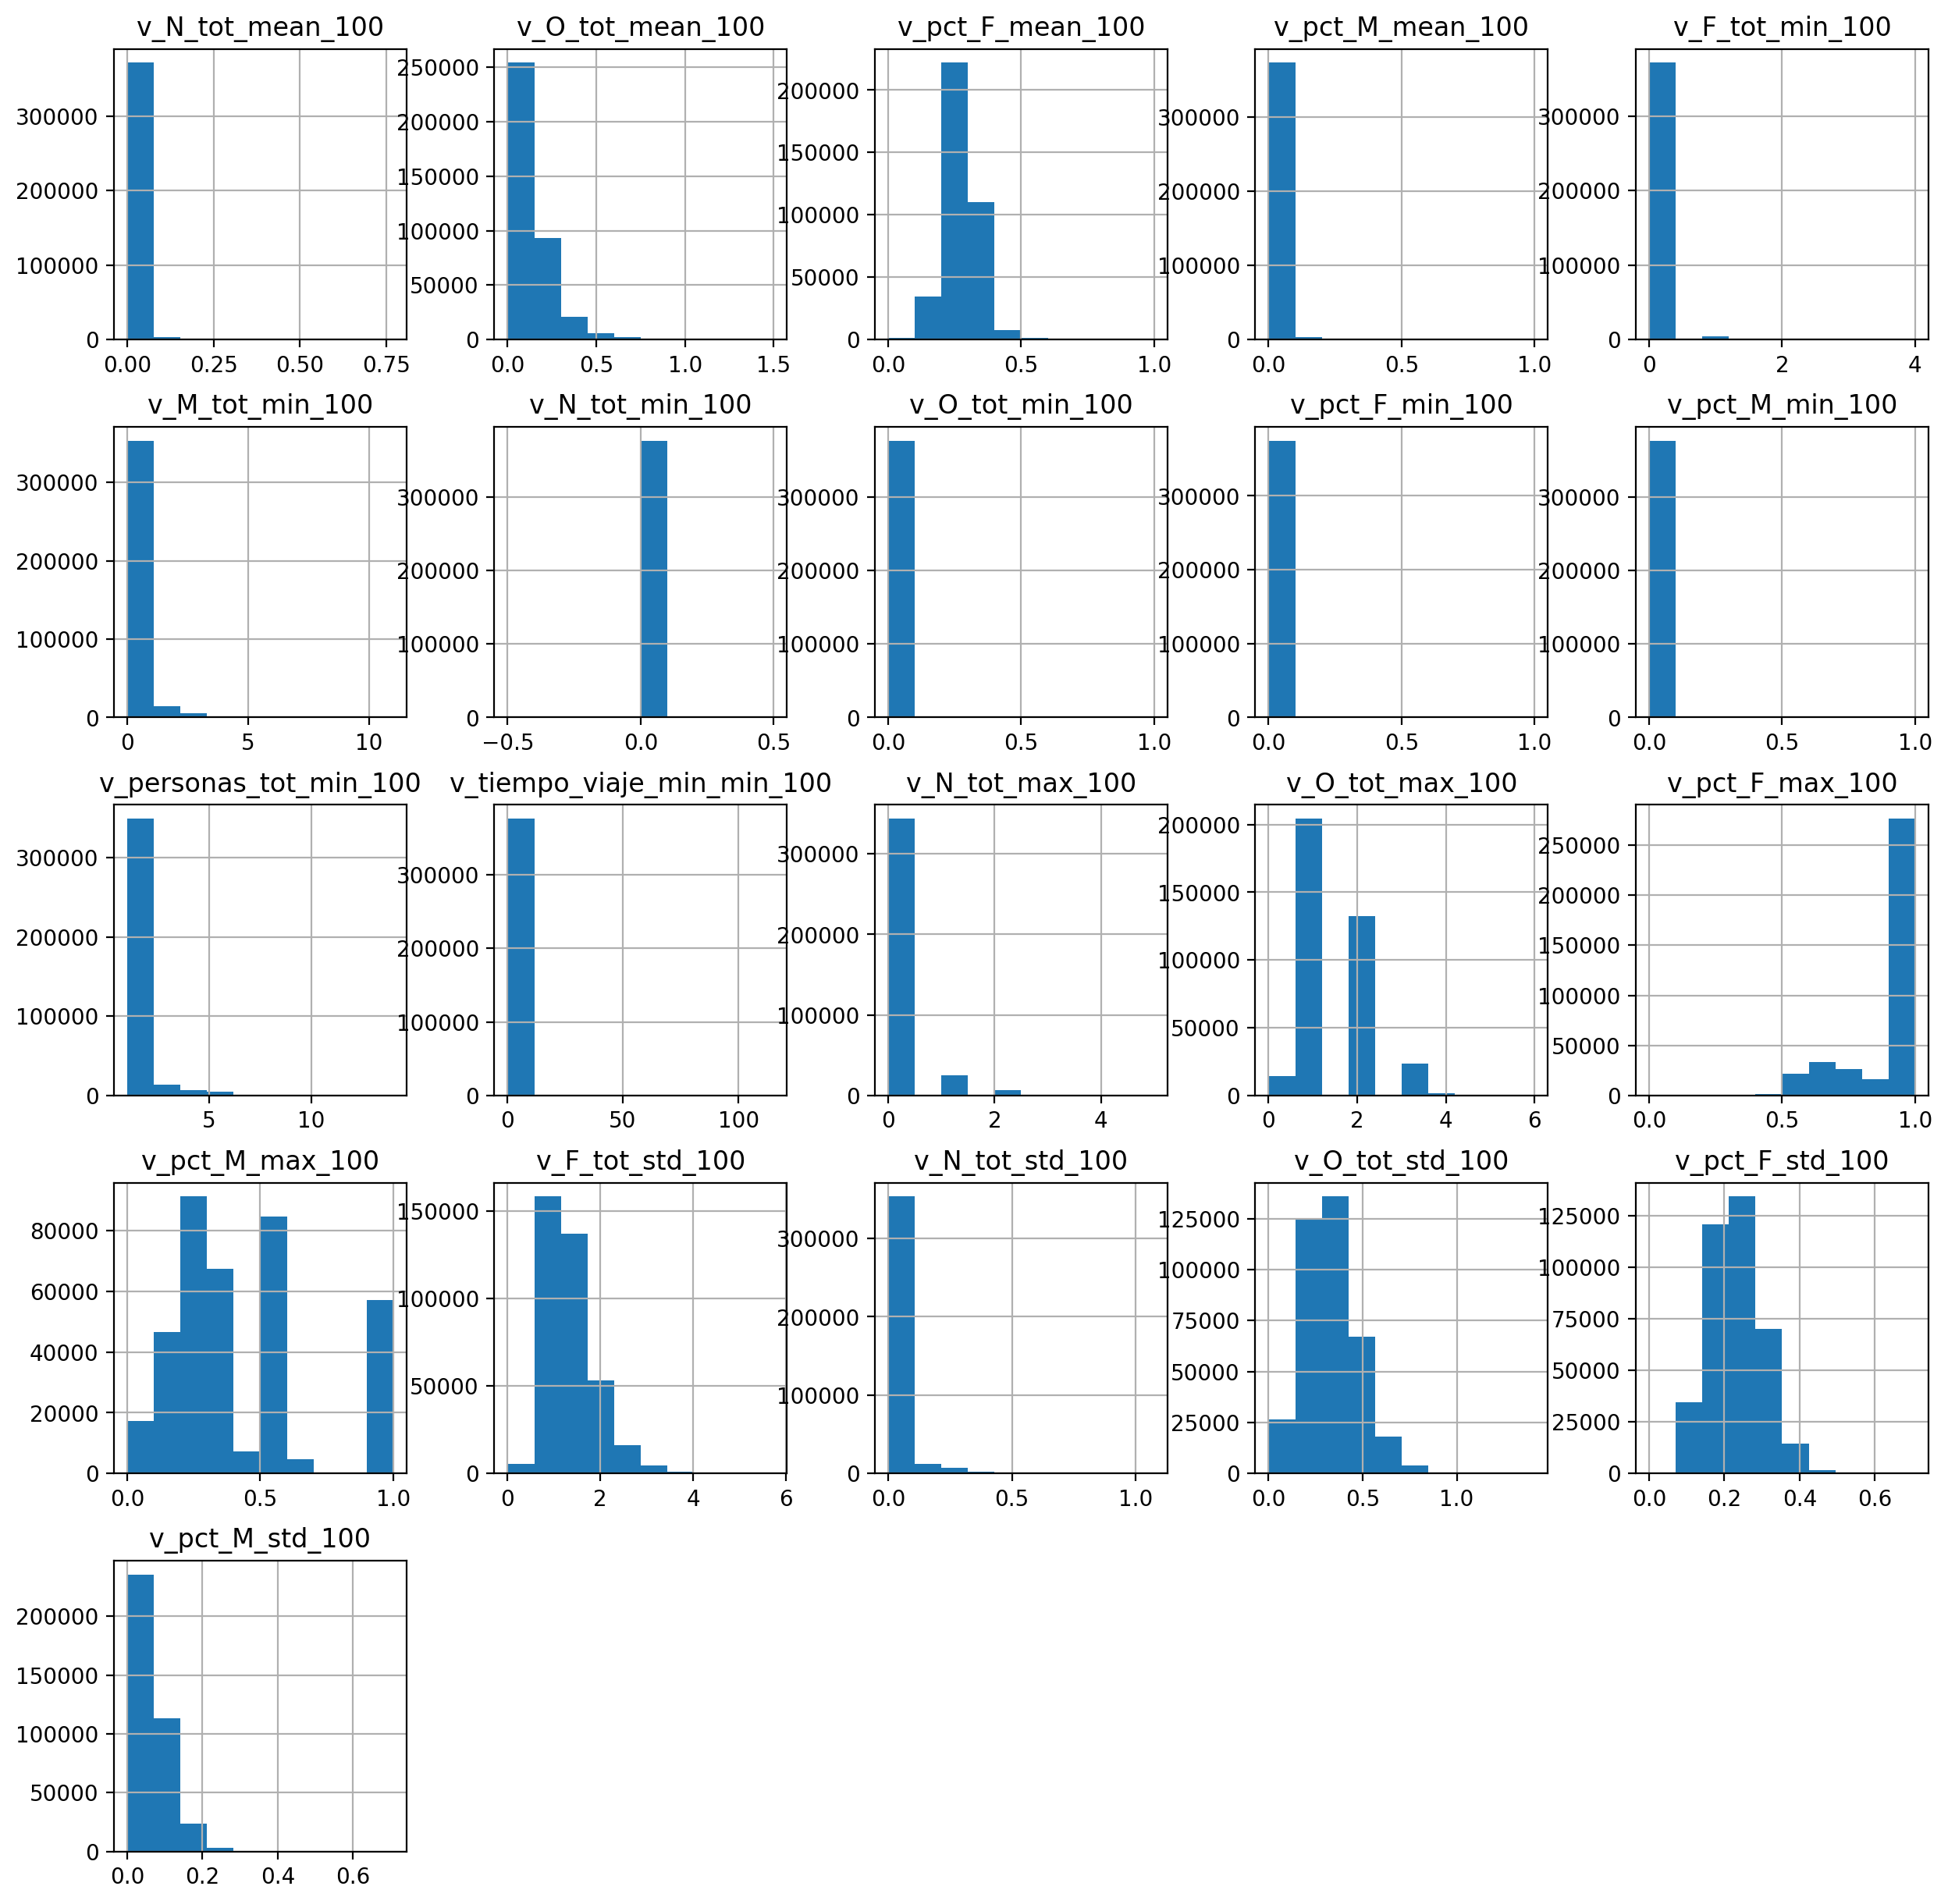

In [16]:
X[sin_varianza].hist(
    figsize=(15, 15)
)

In [17]:
X[sin_varianza].describe(percentiles=np.arange(0,1.01,.1))

,v_N_tot_mean_100,v_O_tot_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_N_tot_min_100,v_O_tot_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_min_min_100,v_N_tot_max_100,v_O_tot_max_100,v_pct_F_max_100,v_pct_M_max_100,v_F_tot_std_100,v_N_tot_std_100,v_O_tot_std_100,v_pct_F_std_100,v_pct_M_std_100
count,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.0,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000
mean,0.003731,0.130489,0.274794,0.022430,0.015293,0.343049,0.0,0.000050,0.001466,0.000025,1.320003,1.858424,0.112226,1.456445,0.913861,0.416777,1.342481,0.017030,0.327493,0.231632,0.069931
std,0.019758,0.112939,0.062026,0.019760,0.134405,0.753112,0.0,0.007102,0.018029,0.004025,0.939386,0.899990,0.403919,0.697960,0.154021,0.282779,0.554836,0.064488,0.147835,0.068679,0.044999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.024390,0.201382,0.005319,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.200000,0.000000,1.000000,0.666667,0.142857,0.776737,0.000000,0.156150,0.143814,0.027315
20%,0.000000,0.043478,0.226421,0.009201,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.366667,0.000000,1.000000,0.750000,0.200000,0.898161,0.000000,0.208373,0.169997,0.036738
30%,0.000000,0.061728,0.244457,0.012453,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.500000,0.000000,1.000000,1.000000,0.250000,1.003704,0.000000,0.247002,0.190901,0.044146
40%,0.000000,0.080808,0.259789,0.015376,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.633333,0.000000,1.000000,1.000000,0.285714,1.108893,0.000000,0.282330,0.209614,0.051423
50%,0.000000,0.101010,0.273079,0.018324,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.750000,0.000000,1.000000,1.000000,0.333333,1.227143,0.000000,0.315869,0.227282,0.059097


In [18]:
len(sin_varianza)

21

In [19]:
X.drop( sin_varianza, axis=1, inplace=True )

In [20]:
varc = [ v for v in varc if v not in sin_varianza ]
len(varc)

39

### Valores extremos

__Cerca percentil__

In [21]:
ext = X[varc].describe( percentiles=[0.01,0.99] ).T[['1%','99%']].reset_index()
for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)

X['ext'] = X.filter(like='ol').max(axis=1)
X.drop( X.filter(like='ol').columns , axis=1 , inplace=True)

print(X['ext'].value_counts(1)*100)

ext
0    78.91425
1    21.08575
Name: proportion, dtype: float64


__Cerca Intercuartil__

In [22]:
k = 2

ext = X[varc].describe().T[['mean', '25%', '75%']].reset_index()

In [23]:
ext['IQR'] = ext['75%'] - ext['25%']
ext['li'] = ext['mean'] - k*ext['IQR']
ext['ls'] = ext['mean'] + k*ext['IQR']
ext = ext[['index', 'li', 'ls']]

In [24]:
for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)

In [25]:
X['ext_iqr'] = X.filter(like='ol').max(axis=1)
X.drop( X.filter(like='ol').columns , axis=1 , inplace=True)

print(X['ext_iqr'].value_counts(1)*100)

ext_iqr
1    100.0
Name: proportion, dtype: float64


__Antes de eliminar registros, asegurar que se tiene el identificador del registro ( Unidad muestral)__

In [26]:
X.shape, tad.shape

((376643, 41), (376643, 63))

In [27]:
X[um] = tad[um]

In [28]:
X

,v_F_tot_sum_100,v_M_tot_sum_100,v_N_tot_sum_100,v_O_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_edad_prom_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_M_tot_std_100,v_edad_prom_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100,ext,ext_iqr,Ciclo_Estacion_Retiro,ancla
0,19.0,93.0,0.0,1.0,303.290312,1.459266,0.052632,113.0,274.133333,105.673025,33.083333,71.202222,2.375000,11.625000,37.911289,14.125000,34.266667,13.209128,4.135417,30.142857,19.183333,10.602381,5.0,21.0,41.428571,26.0,54.150000,17.307018,6.600000,8.900278,5.344537,11.306875,5.950690,3.571382,6.685539,11.716506,2.384026,1.398935,1.855736,1,1,001,202
1,15.0,19.0,0.0,2.0,280.416667,3.250000,0.750000,36.0,179.066667,95.234722,44.050000,60.043060,1.875000,2.375000,35.052083,4.500000,22.383333,11.904340,5.506250,32.500000,6.866667,4.358333,3.0,4.0,39.000000,6.0,32.250000,15.970833,11.750000,7.505383,3.547319,13.603440,1.302470,2.545591,1.414214,7.739771,3.393009,3.308670,3.396134,1,1,002,202
2,24.0,56.0,0.0,0.0,291.052742,2.318975,0.000000,80.0,274.150000,121.380975,35.300000,74.330705,3.000000,7.000000,36.381593,10.000000,34.268750,15.172622,4.412500,32.909091,13.400000,7.858333,9.0,11.0,43.100000,14.0,84.000000,22.790909,8.250000,9.291338,4.633702,22.704544,3.116775,4.109456,2.878492,21.220837,4.119011,2.434014,5.743147,1,1,005,202
3,21.0,55.0,0.0,1.0,293.541880,2.349573,0.066667,77.0,291.766667,114.168526,41.966667,72.220109,2.625000,6.875000,36.692735,9.625000,36.470833,14.271066,5.245833,30.384615,9.333333,6.104167,5.0,11.0,45.666667,15.0,119.183333,20.258974,17.566667,9.027514,1.267251,30.307828,3.356763,5.150489,4.274091,34.658066,4.685169,5.121018,9.073715,1,1,006,202
4,30.0,93.0,0.0,2.0,304.940702,2.103975,0.121795,125.0,285.350000,123.280836,37.400000,72.645566,3.750000,11.625000,38.117588,15.625000,35.668750,15.410104,4.675000,32.952381,20.850000,12.068889,6.0,19.0,44.466667,26.0,44.900000,20.045833,7.166667,9.080696,5.174310,13.814188,5.262740,4.451326,5.804862,9.677455,2.500899,1.348897,3.333633,1,1,007,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376638,97.0,211.0,5.0,6.0,2979.416270,30.377381,1.416667,319.0,2587.283333,1614.850172,887.883333,838.646131,1.021053,2.221053,31.362277,3.357895,27.234561,16.998423,9.346140,21.000000,4.166667,4.166667,4.0,7.0,49.000000,9.0,57.550000,57.383333,57.383333,11.034818,0.023570,30.476302,1.751467,5.537181,2.057244,13.636744,9.076018,8.986040,6.372457,0,1,705,897
376639,31.0,103.0,0.0,1.0,2321.000000,16.033333,0.500000,135.0,1169.766667,863.489722,602.550000,328.850820,0.469697,1.560606,35.166667,2.045455,17.723737,13.083178,9.129545,21.500000,3.483333,3.308333,2.0,5.0,72.000000,6.0,53.383333,40.083333,40.083333,8.020752,0.011785,26.351513,1.068842,9.442550,1.156012,11.912023,8.646444,8.376988,6.621451,0,1,706,897
376640,106.0,168.0,0.0,3.0,3328.653968,33.488095,1.416667,277.0,2275.216667,1537.807130,897.500000,694.176516,1.139785,1.806452,35.791978,2.978495,24.464695,16.535561,9.650538,21.000000,1.633333,1.633333,4.0,6.0,57.000000,9.0,63.150000,45.783333,45.783333,9.641340,0.058926,31.218764,1.279080,6.776031,1.744423,13.405024,8.846674,8.434987,6.171334,0,1,708,897
376641,345.0,632.0,29.0,20.0,3392.769815,30.465822,1.776634,1026.0

In [29]:
X = X.loc[ X['ext'] == 0 ].reset_index(drop=True).drop(['ext','ext_iqr'],axis=1)

array([[<Axes: title={'center': 'v_F_tot_sum_100'}>,
        <Axes: title={'center': 'v_M_tot_sum_100'}>,
        <Axes: title={'center': 'v_N_tot_sum_100'}>],
       [<Axes: title={'center': 'v_O_tot_sum_100'}>,
        <Axes: title={'center': 'v_edad_prom_sum_100'}>,
        <Axes: title={'center': 'v_pct_F_sum_100'}>],
       [<Axes: title={'center': 'v_pct_M_sum_100'}>,
        <Axes: title={'center': 'v_personas_tot_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_max_sum_100'}>]],
      dtype=object)

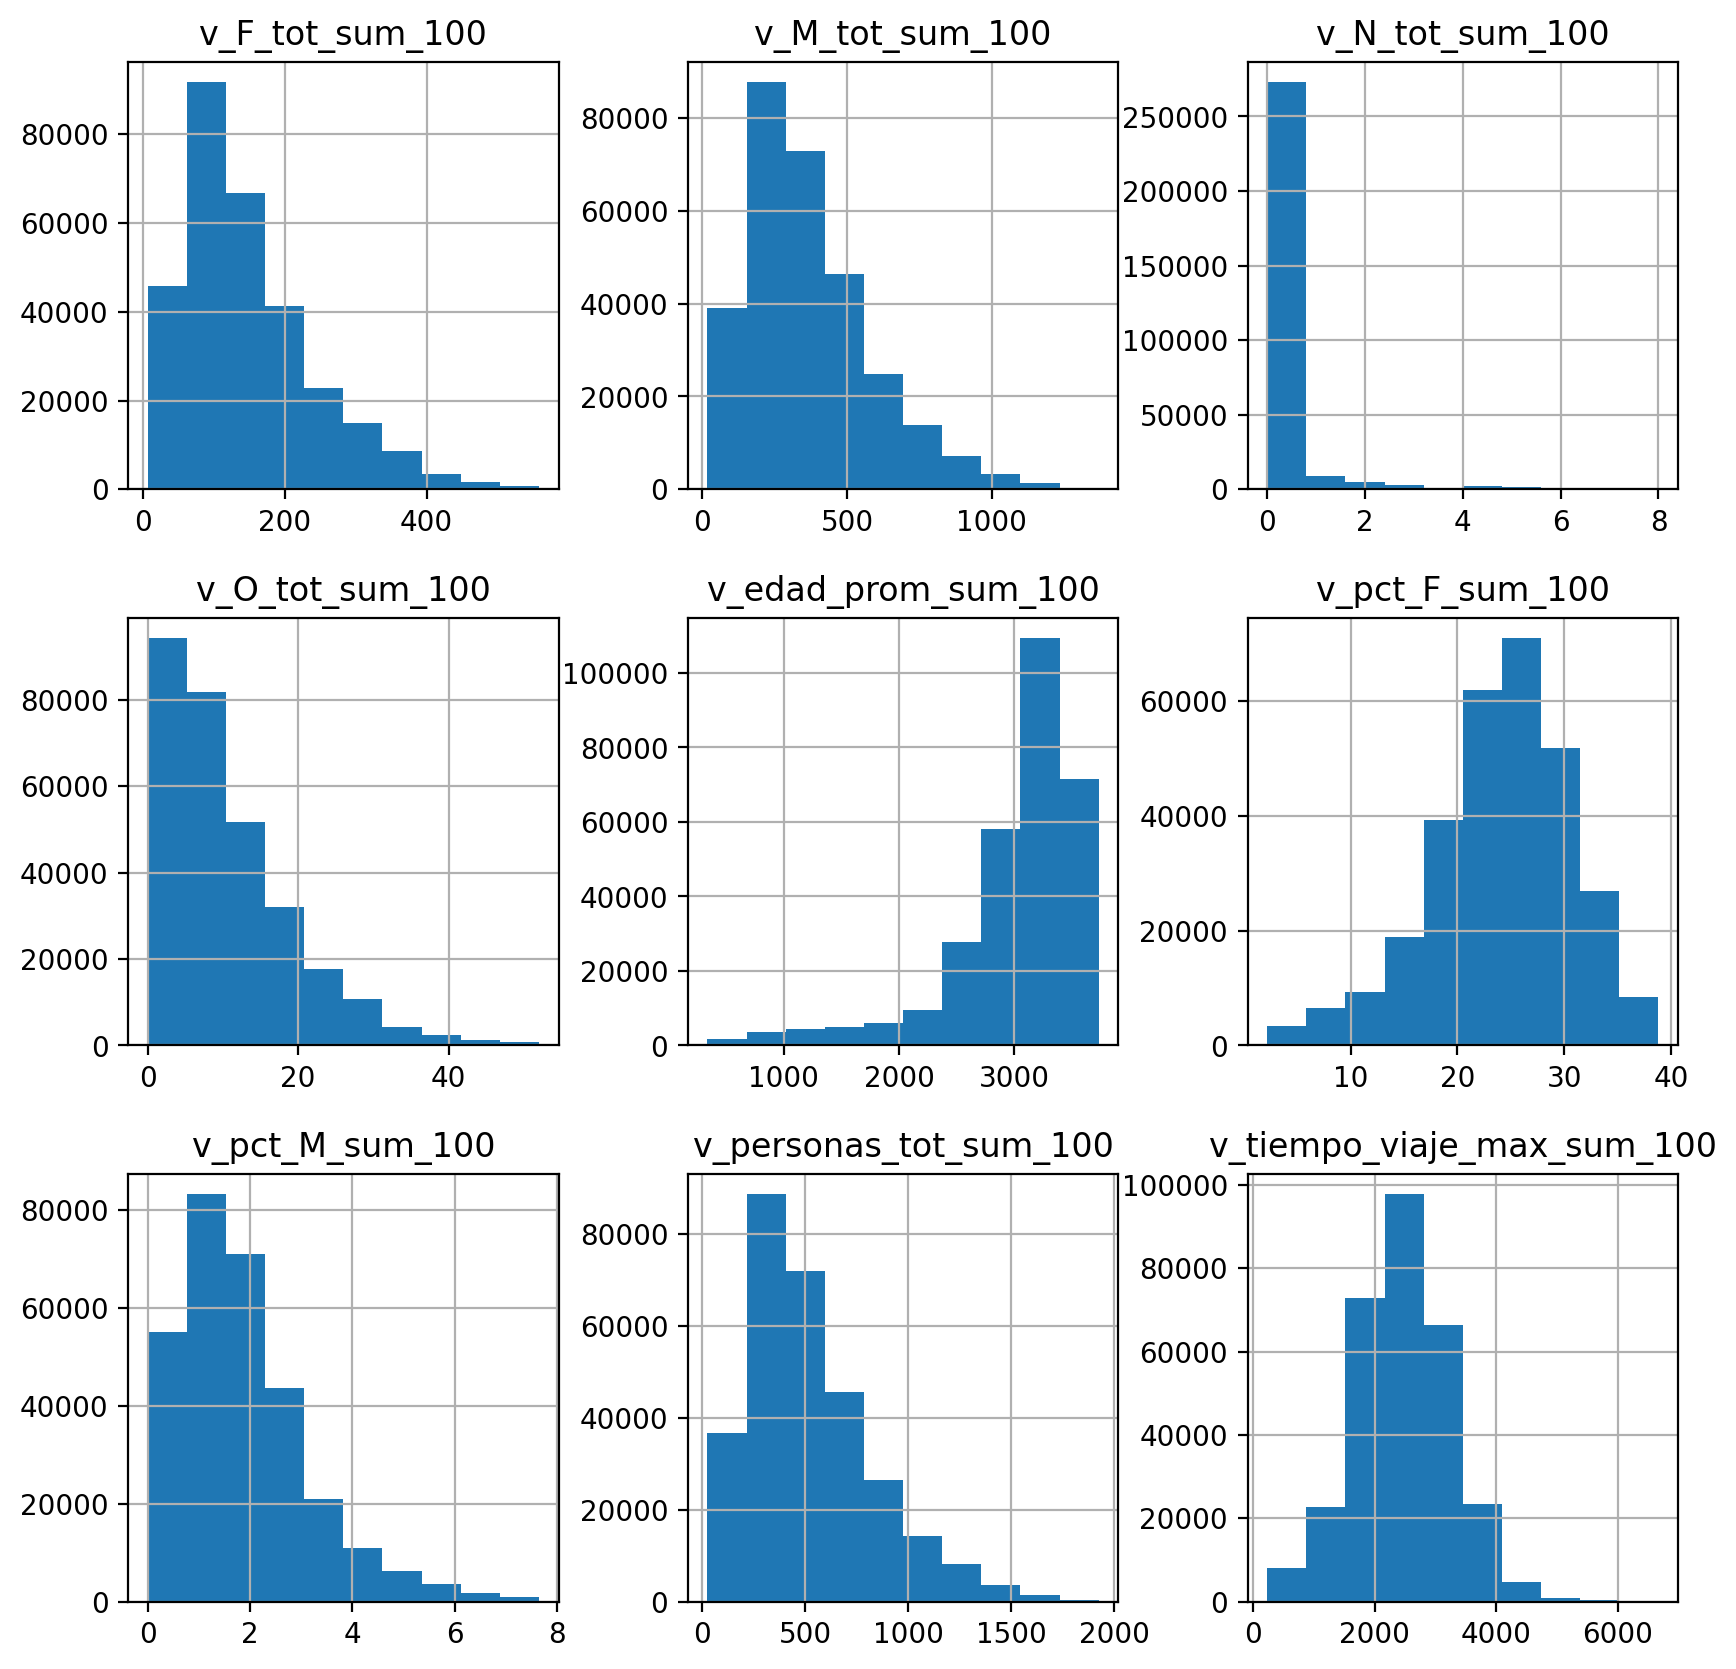

In [30]:
X[varc[:9]].hist(figsize=(10, 10))

### Analisis Bivariado

In [31]:
X[varc].corr()

,v_F_tot_sum_100,v_M_tot_sum_100,v_N_tot_sum_100,v_O_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_edad_prom_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_M_tot_std_100,v_edad_prom_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100
v_F_tot_sum_100,1.000000,0.904770,0.187387,0.613492,0.480135,0.595086,0.062854,0.953024,0.780693,0.406503,-0.396634,0.694469,0.968993,0.865640,-0.058606,0.920621,0.681942,-0.036052,-0.694559,0.496559,0.580558,0.489864,0.850082,0.808592,-0.483631,0.850078,0.230099,-0.059349,-0.463066,0.309701,0.573651,0.119608,0.789442,-0.734288,0.837605,0.193120,-0.288027,-0.645514,0.022396
v_M_tot_sum_100,0.904770,1.000000,0.173420,0.612981,0.519828,0.355615,0.045124,0.990938,0.819884,0.457516,-0.369690,0.722644,0.857597,0.964479,-0.019137,0.955588,0.713470,0.000523,-0.692945,0.501481,0.615364,0.535041,0.776094,0.905655,-0.491767,0.891346,0.230571,-0.058981,-0.463928,0.314276,0.594071,0.117291,0.900892,-0.753640,0.890593,0.190630,-0.299780,-0.650321,0.014598
v_N_tot_sum_100,0.187387,0.173420,1.000000,0.098171,0.127782,0.129328,0.003428,0.183792,0.162884,0.122576,-0.032213,0.145785,0.162073,0.146688,-0.023886,0.157882,0.112806,0.009405,-0.112614,0.066208,0.092146,0.073839,0.133451,0.147554,-0.073808,0.150716,0.012362,-0.029510,-0.069363,0.048976,0.086645,-0.004628,0.143744,-0.121914,0.151035,0.001487,-0.071102,-0.097851,-0.023876
v_O_tot_sum_100,0.613492,0.612981,0.098171,1.000000,0.358032,0.286375,0.681433,0.642507,0.550517,0.287942,-0.285793,0.503793,0.582157,0.582612,0.005178,0.616628,0.476838,-0.033915,-0.503246,0.357364,0.410376,0.355934,0.528184,0.542668,-0.336711,0.567765,0.159257,-0.050973,-0.342332,0.223363,0.407421,0.080409,0.515428,-0.515308,0.543067,0.132267,-0.214934,-0.476165,0.011588
v_edad_prom_sum_100,0.480135,0.519828,0.127782,0.358032,1.000000,0.665992,0.223704,0.519286,0.702696,0.761208,0.291398,0.712658,0.292312,0.318387,0.171238,0.317787,0.225687,-0.121208,-0.400684,0.117929,0.065351,0.026674,0.329469,0.355409,-0.017624,0.342994,0.128208,0.036148,-0.105455,0.073062,0.054430,0.101548,0.311351,-0.283110,0.306235,0.074928,-0.147961,-0.315290,0.012279
v_pct_F_sum_100,0.595086,0.355615,0.129328,0.286375,0.665992,1.000000,0.135493,0.436962,0.532172,0.510475,0.114314,0.541140,0.485450,0.202967,-0.121171,0.295533,0.191201,-0.151657,-0.376023,0.091986,0.072495,0.023229,0.431197,0.234679,-0.124093,0.299343,0.114267,0.015356,-0.134272,0.068429,0.077552,0.086948,0.199426,-0.309399,0.262721,0.074988,-0.131842,-0.304104,0.019065
v_pct_M_sum_100,0.062854,0.045124,0.003428,0.681433,0.223704,0.135493,1.000000,0.069508,0.134696,0.156344,0.071995,0.153086,0.012752,-0.012437,0.003698,0.015730,0.011440,-0.060482,-0.088938,-0.014341,-0.013250,-0.022377,0.035846,0.001545,-0.002732,0.022325,0.022445,-0.001847,-0.022788,0.006291,-0.004462,0.016603,-0.022973,-0.044473,-0.007646,0.009752,-0.037796,-0.071087,0.000202
v_personas_tot_sum_100,0.953024,0.990938,0.183792,0.642507,0.519286,0.436962,0.069508,1.000000,0.825581,0.451465,-0.386636,0.730109,0.909680,0.953328,-0.031014,0.964666,0.719054,-0.011423,-0.709218,0.511183,0.617843,0.532654,0.815133,0.893808,-0.499929,0.897009,0.235376,-0.060723,-0.474368,0.319913,0.600746,0.120456,0.883926,-0.764079,0.892033,0.195462,-0.303054,-0.663769,0.017230
v_tiempo_viaje_max_sum_100,0.780693,0.819884,0.162884,0.550517,0.702696,0.53217

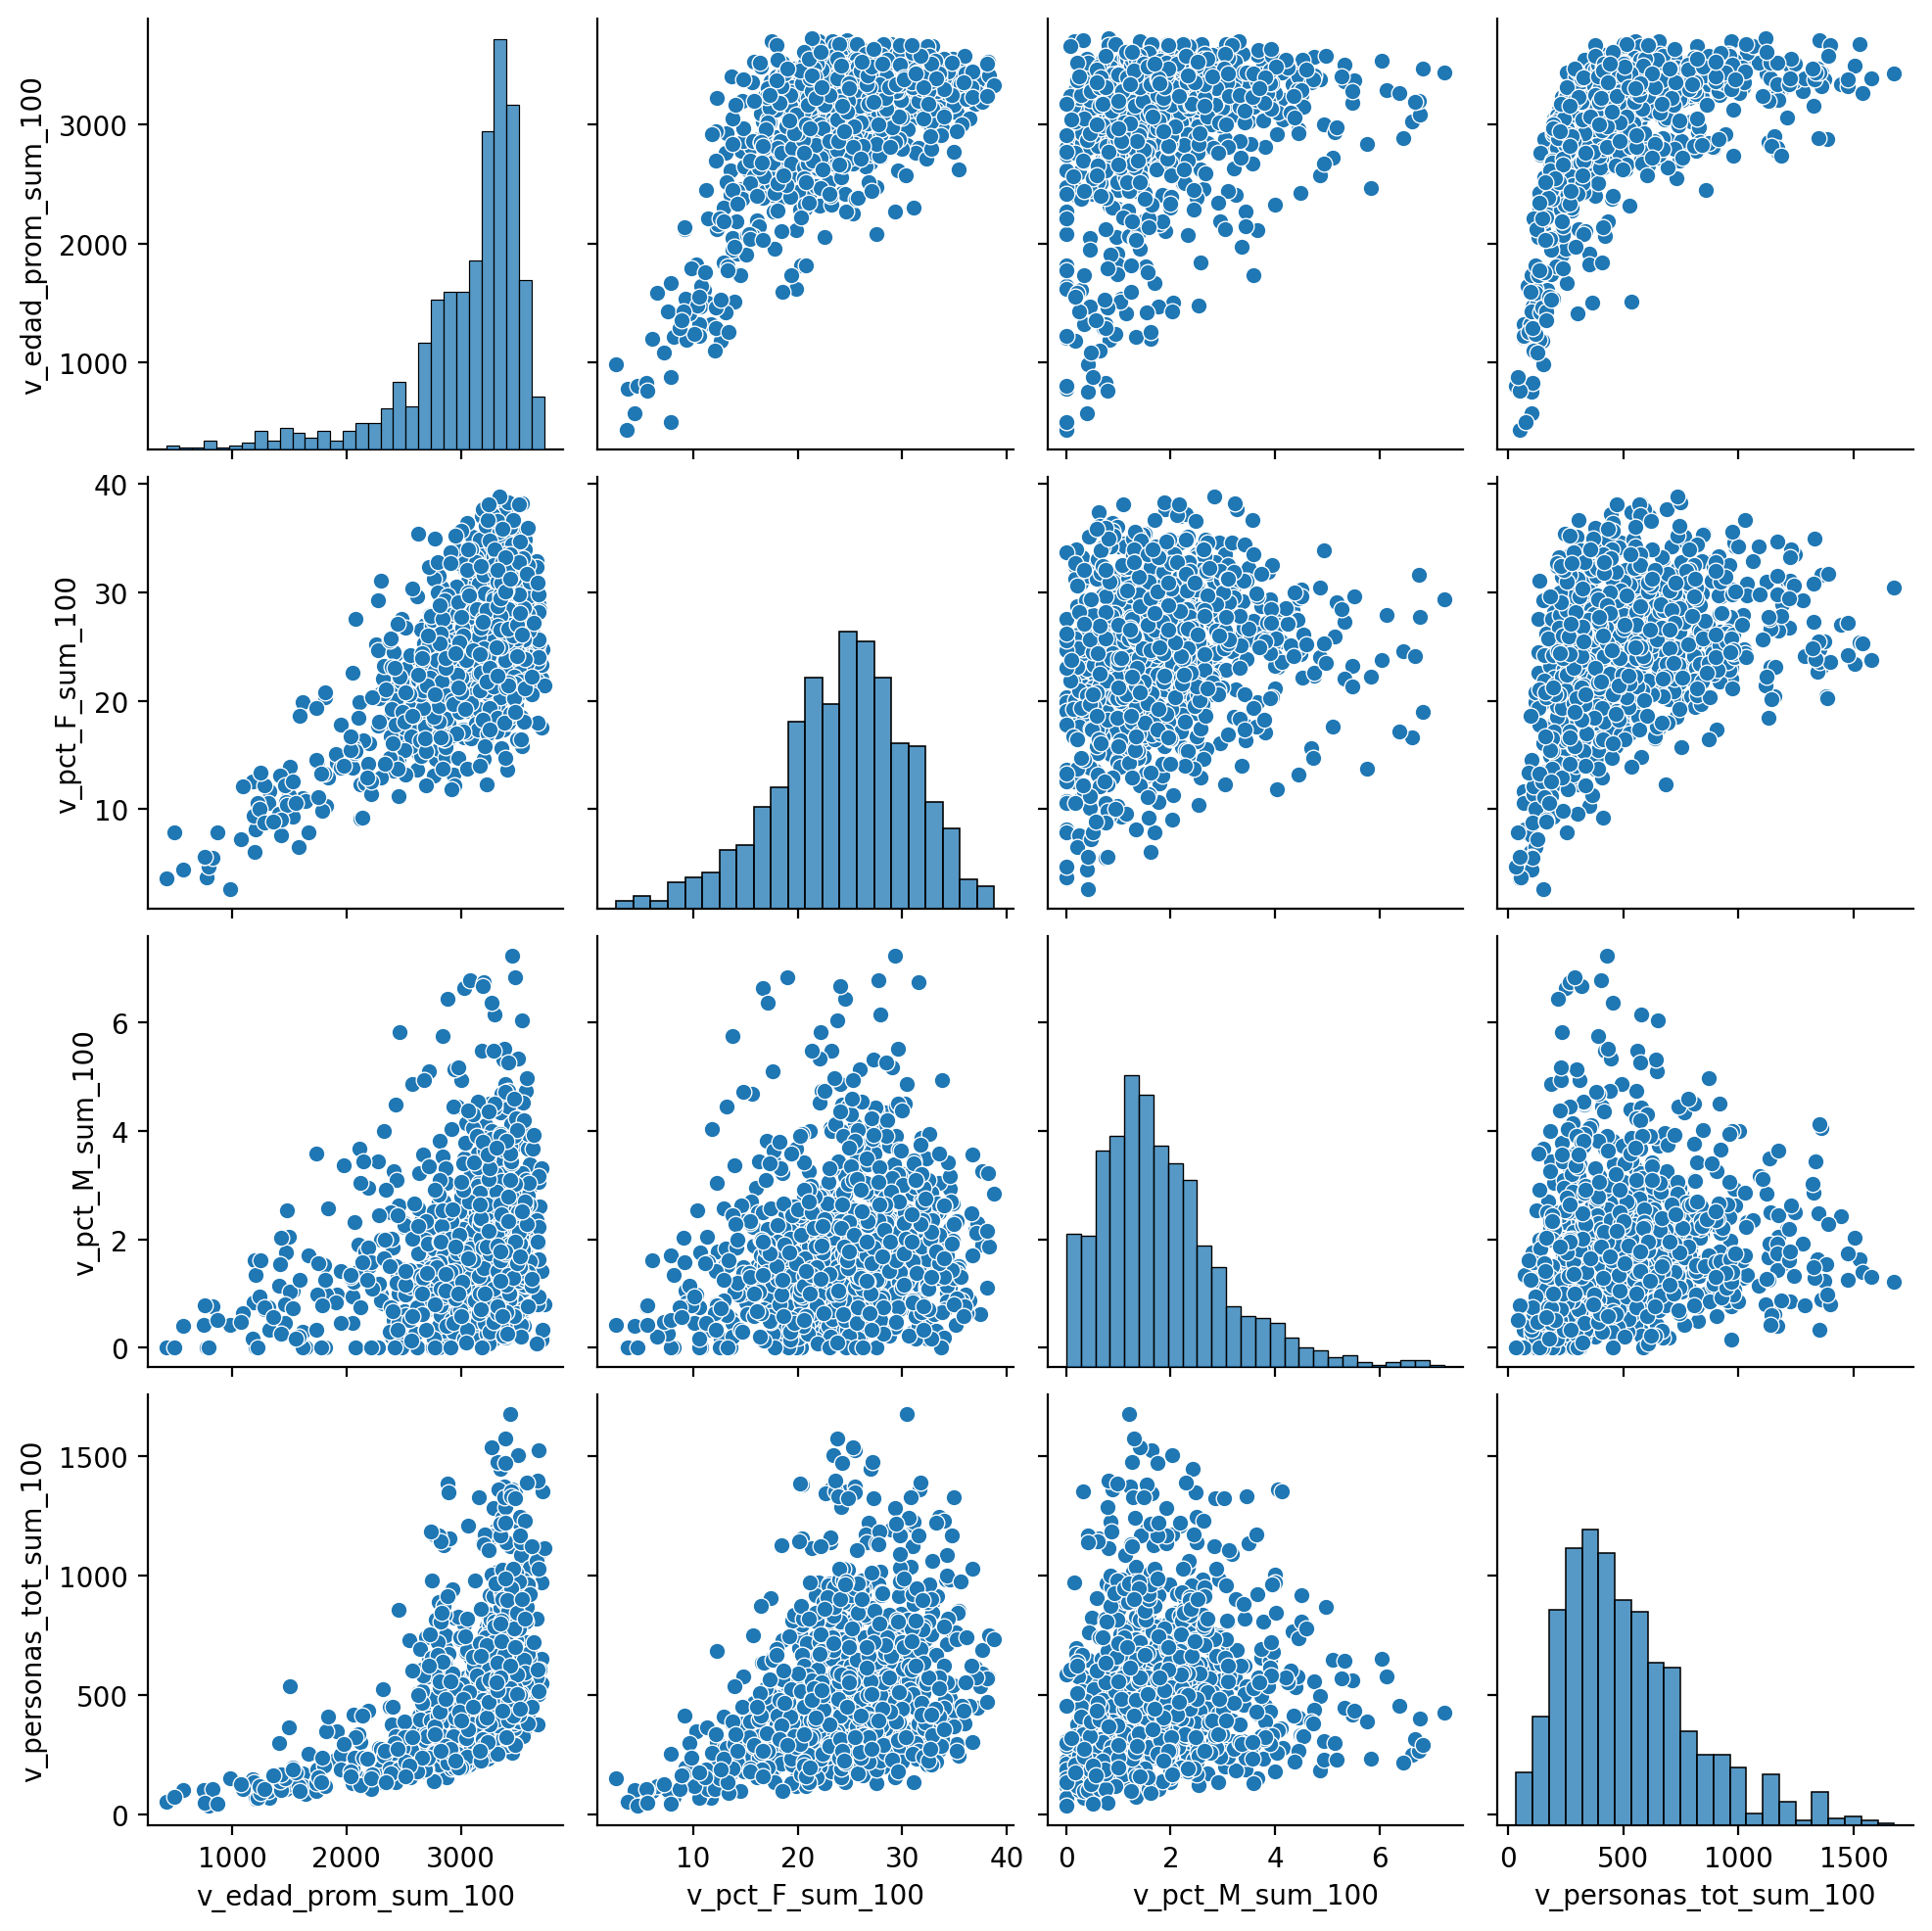

In [32]:
import seaborn as sns

sns.pairplot( X[varc[4:8]].sample(1000) )

### Multicolinealidad

In [50]:
### Actualizar varclushi
!pip install --upgrade varclushi

In [33]:
from varclushi import VarClusHi

# Para los clusters de variables conbase en su correlación
vc = VarClusHi( df=X[varc], feat_list=varc )

# Aqui se genera el cluster
vc.varclus()

In [34]:
rs = vc.rsquare
rs = rs.sort_values( by=['Cluster','RS_Ratio'] , ascending=[1,1] ).reset_index(drop=True)
rs['id'] = rs.groupby( 'Cluster' ).cumcount() + 1
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,v_personas_tot_mean_100,0.971073,0.523506,0.060709,1
1,0,v_personas_tot_sum_100,0.938026,0.464367,0.115703,2
2,0,v_M_tot_mean_100,0.941603,0.517683,0.121076,3
3,0,v_M_tot_sum_100,0.914648,0.439617,0.152310,4
4,0,v_personas_tot_std_100,0.897219,0.390137,0.168531,5
5,0,v_personas_tot_max_100,0.895891,0.417458,0.178715,6
6,0,v_M_tot_std_100,0.866197,0.388415,0.218780,7
7,0,v_M_tot_max_100,0.869166,0.409124,0.221423,8
8,0,v_F_tot_mean_100,0.872054,0.445806,0.230869,9
9,0,v_F_tot_sum_100,0.862969,0.451629,0.249887,10


In [35]:
varc = rs.loc[rs['id'] == 1]['Variable'].tolist()
varc

['v_personas_tot_mean_100',
 'v_tiempo_viaje_std_std_100',
 'v_edad_prom_sum_100',
 'v_tiempo_viaje_min_std_100',
 'v_tiempo_viaje_max_min_100',
 'v_tiempo_viaje_mean_mean_100',
 'v_N_tot_sum_100']

In [36]:
tad_01 = X[um + varc].merge( tad[um + [tgt] ] , on = um , how='inner' ).reset_index(drop=True)
tad_01.to_parquet("../data/ecobici/TAD_FINAL_ECO.parquet")

### Ajuste una Regresion Lineal$$y = \theta x + \theta_0$$

In [37]:
tad_01.shape

(297225, 10)

<Axes: >

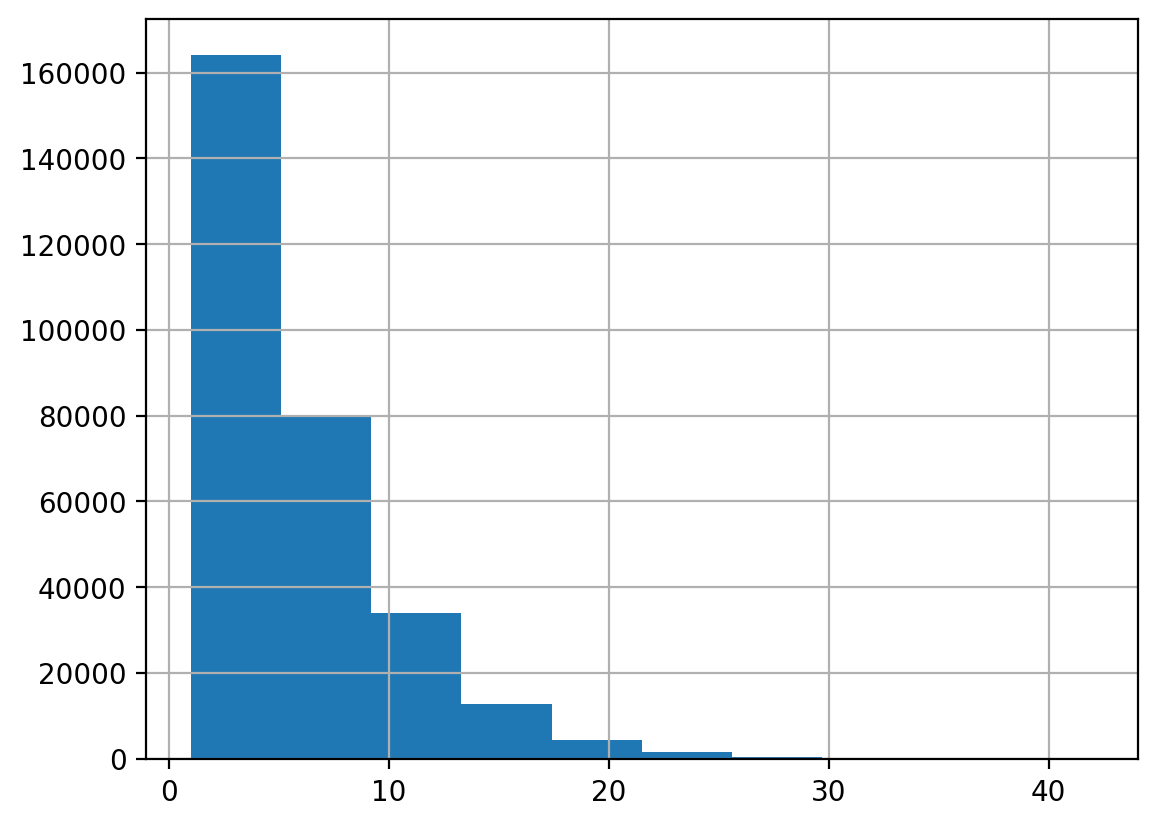

In [38]:
tad_01[tgt].hist()

<Axes: >

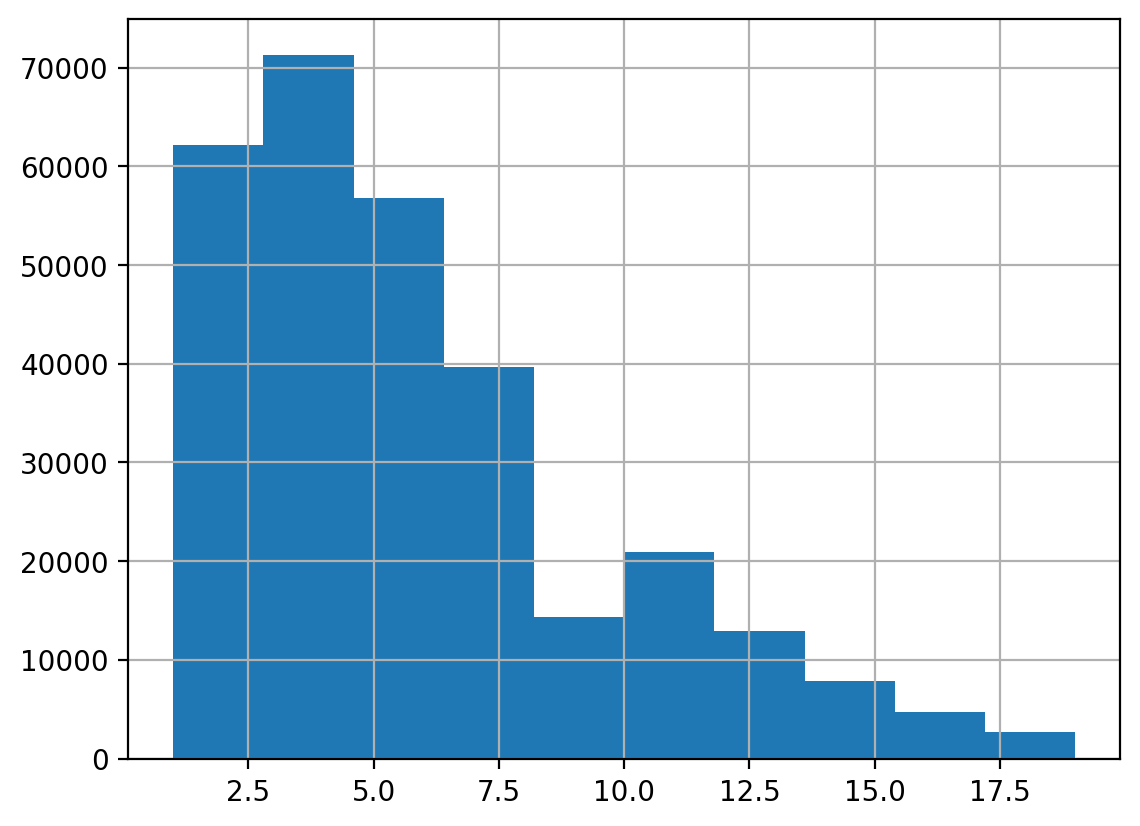

In [39]:
tad_01 = tad_01.loc[ tad_01[tgt] < 20 ].reset_index()
tad_01[tgt].hist()

In [40]:
tad_01.shape

(293616, 11)